# **PI - Insights de Crescimento com o Tesouro Selic.**

### Conectando o notebook com o google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importando as bibliotecas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.dates as mdates
from statsmodels.tsa.arima.model import ARIMA

### Importanto o dataset e criando o dataframe.

In [ ]:
data_path = '/content/drive/MyDrive/datasets/VendasTesouroDireto.csv'
df = pd.read_csv(data_path)

## **Iniciando com a análise exploratória dos dados.**

### Mostrando as 5 primeiras linhas do dataframe, para ter uma noção dos dados.

In [ ]:
df.head()

,Tipo Titulo,Vencimento do Titulo,Data Venda,PU,Quantidade,Valor
0,Tesouro IPCA+ com Juros Semestrais,15/05/2035,27/09/2012,"2775,920315","354,9","985174,11"
1,Tesouro IPCA+,15/08/2024,27/09/2012,"1362,596836","1114,56","1518695,92"
2,Tesouro Prefixado,01/01/2016,27/09/2012,"756,820283","787,52","596011,1"
3,Tesouro IPCA+,15/05/2015,28/09/2012,"2033,318706","500,21","1017086,34"
4,Tesouro Prefixado com Juros Semestrais,01/01/2023,28/09/2012,"1033,173825","589,04","608580,7"


### Forma do dataframe (linhas, colunas).

In [ ]:
df.shape

(74962, 6)

### Limpando e Especificando os dados, no caso definindo o título de tesouro Selic para análise.

In [ ]:
df_selic = df[df['Tipo Titulo'] == 'Tesouro Selic']

### Forma do novo dataframe (linhas, colunas).

In [ ]:
df_selic.shape

(9081, 6)

### Mostrando as 5 primeiras linhas do novo dataframe, para ter uma noção dos dados.

In [ ]:
df_selic.head()

,Tipo Titulo,Vencimento do Titulo,Data Venda,PU,Quantidade,Valor
6,Tesouro Selic,07/03/2017,16/05/2012,"5222,129522","100,6","525346,22"
20,Tesouro Selic,07/03/2017,28/09/2012,"5356,3",85,"455285,5"
34,Tesouro Selic,07/03/2017,01/10/2012,"5357,819284","108,79","582877,15"
46,Tesouro Selic,07/03/2017,17/05/2012,"5223,876519","36,2","189104,32"
50,Tesouro Selic,07/03/2017,18/05/2012,"5225,619343","164,4","859091,81"


### Exibindo algumas informações sobre os dados.

In [ ]:
df_selic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9081 entries, 6 to 74957
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Tipo Titulo           9081 non-null   object
 1   Vencimento do Titulo  9081 non-null   object
 2   Data Venda            9081 non-null   object
 3   PU                    9081 non-null   object
 4   Quantidade            9081 non-null   object
 5   Valor                 9081 non-null   object
dtypes: object(6)
memory usage: 496.6+ KB


### Verificando se há valores nulos no dataframe, e somando os valores nulos se houver.

In [ ]:
df_selic.isnull().sum()

Tipo Titulo             0
Vencimento do Titulo    0
Data Venda              0
PU                      0
Quantidade              0
Valor                   0
dtype: int64

### Verificando se há valores duplicados, e somando os valores duplicados se houver.

In [ ]:
df_selic.duplicated().sum()

0

### Convertando as datas para tipo datetime.

In [ ]:
columns_to_convert_date = ["Vencimento do Titulo", "Data Venda"]
df_selic[columns_to_convert_date] = df_selic[columns_to_convert_date].apply(pd.to_datetime, errors="coerce")

<ipython-input-145-cbb2a668ccc3>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_selic[columns_to_convert_date] = df_selic[columns_to_convert_date].apply(pd.to_datetime, errors="coerce")
<ipython-input-145-cbb2a668ccc3>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_selic[columns_to_convert_date] = df_selic[columns_to_convert_date].apply(pd.to_datetime, errors="coerce")
<ipython-input-145-cbb2a668ccc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

### Convertendo os números para tipo numeric.

In [ ]:
columns_to_convert = ["PU", "Quantidade", "Valor"]
df_selic[columns_to_convert] = df_selic[columns_to_convert].replace(',', '.', regex=True).apply(pd.to_numeric, errors="coerce")

<ipython-input-146-40ab38e26976>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selic[columns_to_convert] = df_selic[columns_to_convert].replace(',', '.', regex=True).apply(pd.to_numeric, errors="coerce")


### Informações do dataframe com os tipos das colunas convertidos.

In [ ]:
df_selic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9081 entries, 0 to 9080
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data Venda            9081 non-null   datetime64[ns]
 1   Tipo Titulo           9081 non-null   object        
 2   Vencimento do Titulo  9081 non-null   datetime64[ns]
 3   PU                    9081 non-null   float64       
 4   Quantidade            9081 non-null   float64       
 5   Valor                 9081 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 425.8+ KB


### **Visualizando a distribuição do 'PU' usando um histograma:**

### **Objetivo:** Explorar a distribuição de preços para compreender a amplitude e a frequência dos diferentes níveis de preços.

### **Detalhes:**


*   Um histograma fornece uma representação visual da distribuição da coluna 'PU'.



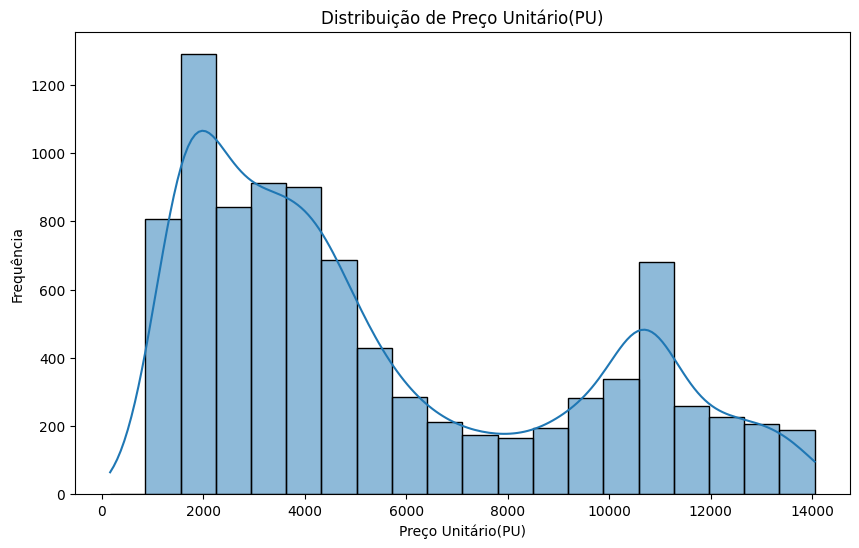

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_selic['PU'], bins=20, kde=True)
plt.title('Distribuição de Preço Unitário(PU)')
plt.xlabel('Preço Unitário(PU)')
plt.ylabel('Frequência')
plt.show()

### **Análise de série temporal de 'Data Venda' vs. 'Valor':**



### **Objetivo:** Explorar a tendência nos valores de vendas ao longo do tempo para identificar padrões ou sazonalidade.

### **Detalhes:**


*   A conversão de 'Data de Venda' para um formato de data e hora facilita a análise baseada no tempo.
*   Traçar 'Data de Venda' em relação a 'Valor' ajuda a visualizar a tendência nos valores de vendas durante um determinado período de tempo.



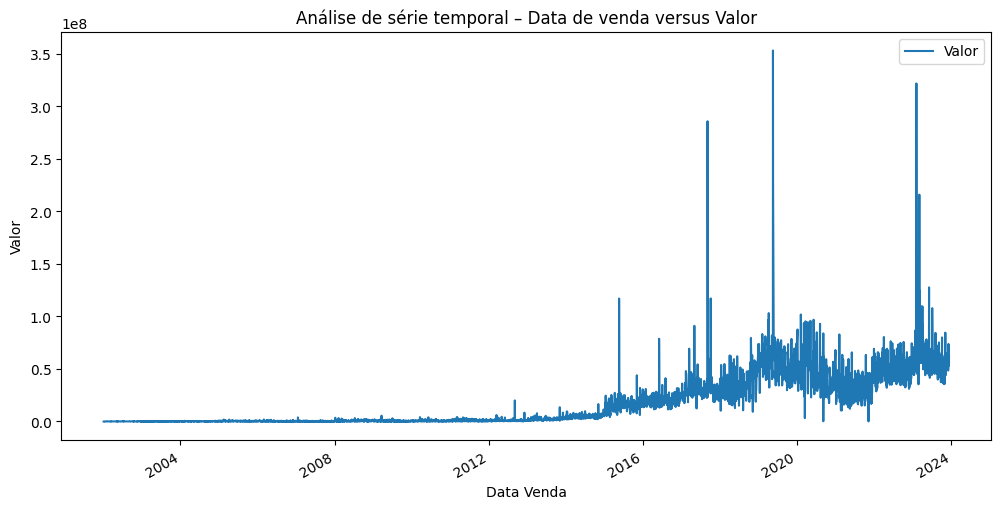

In [ ]:
df_selic.set_index('Data Venda', inplace=True)
df_selic.reset_index(inplace=True)
df_selic.plot(x='Data Venda', y='Valor', figsize=(12, 6))
plt.title('Análise de série temporal – Data de venda versus Valor')
plt.xlabel('Data Venda')
plt.ylabel('Valor')
plt.show()

### **Criando um Pairplot para Colunas Numéricas Selecionadas ('PU', 'Quantidade', 'Valor'):**

### **Objetivo:** Explorar relações e distribuições entre pares de variáveis ​​numéricas.

### **Detalhes:**


*   Um pairplot exibe gráficos de dispersão para cada par de colunas numéricas e histogramas para colunas individuais.
*   Ajuda a identificar padrões, correlações e possíveis discrepâncias.



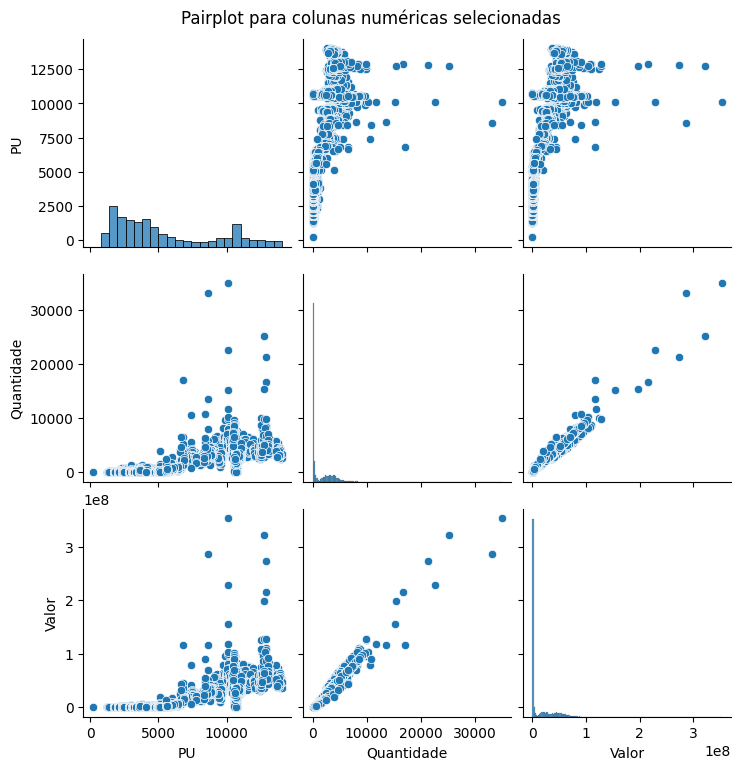

In [ ]:
sns.pairplot(df_selic[['PU', 'Quantidade', 'Valor']])
plt.suptitle('Pairplot para colunas numéricas selecionadas', y=1.02)
plt.show()

### **Gerando um heatmap de correlação para colunas numéricas:**

### **Objetivo:** Explorar as relações lineares entre variáveis ​​numéricas.

### **Detalhes:**


*   Um mapa de calor de correlação representa visualmente os coeficientes de correlação entre pares de colunas numéricas.
*   Ajuda a identificar correlações fortes ou fracas entre variáveis.



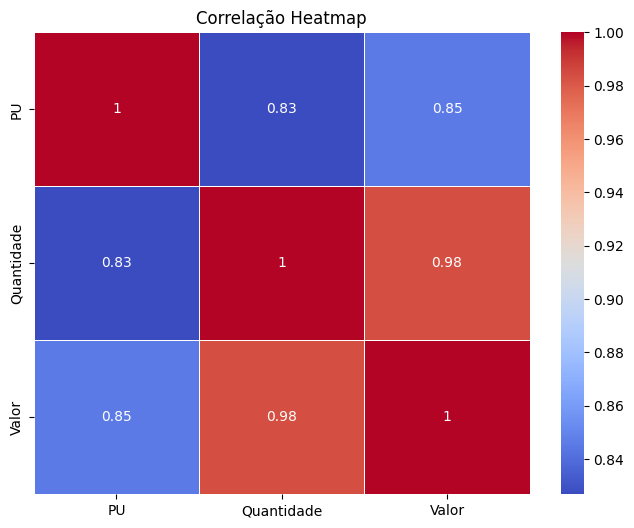

In [ ]:
correlation_matrix = df_selic[['PU', 'Quantidade', 'Valor']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlação Heatmap')
plt.show()

## **Pré-processando os dados e construindo os modelos.**

### Definindo as features e o target.

In [ ]:
features = df_selic[['Vencimento do Titulo', 'Data Venda', 'PU', 'Quantidade']]
target = df_selic['Valor']

### Dividindo os dados para treino e teste do modelo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Convertendo os tipos datetime, em um inteiro, com uma representação em unix timestamp.

In [ ]:
X_train['Vencimento do Titulo'] = pd.to_datetime(X_train['Vencimento do Titulo']).astype(int) // 10**9
X_train['Data Venda'] = pd.to_datetime(X_train['Data Venda']).astype(int) // 10**9
X_test['Vencimento do Titulo'] = pd.to_datetime(X_test['Vencimento do Titulo']).astype(int) // 10**9
X_test['Data Venda'] = pd.to_datetime(X_test['Data Venda']).astype(int) // 10**9

### Dimensionando os dados das features para evitar discrepâncias e inconsistências nos resultados.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Treinando o modelo com a regressão do KNN.


In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

### Avaliando o desempenho do modelo com regressão do KNN.

In [ ]:
y_pred = knn_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("KNN Regression Metrics:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

KNN Regression Metrics:
Mean Squared Error: 7646406417763.541
Mean Absolute Error: 267206.9213703909
R-squared: 0.986286059233623


### Convertendo as datas que estão em unix timestamp para datetime novamente.

In [ ]:
columns_to_convert_date = ["Vencimento do Titulo", "Data Venda"]
X_test[columns_to_convert_date] = X_test[columns_to_convert_date].apply(pd.to_datetime, errors="coerce", unit="s")

### Visualização dos valores previstos contra valores reais utilizando regressão do KNN.

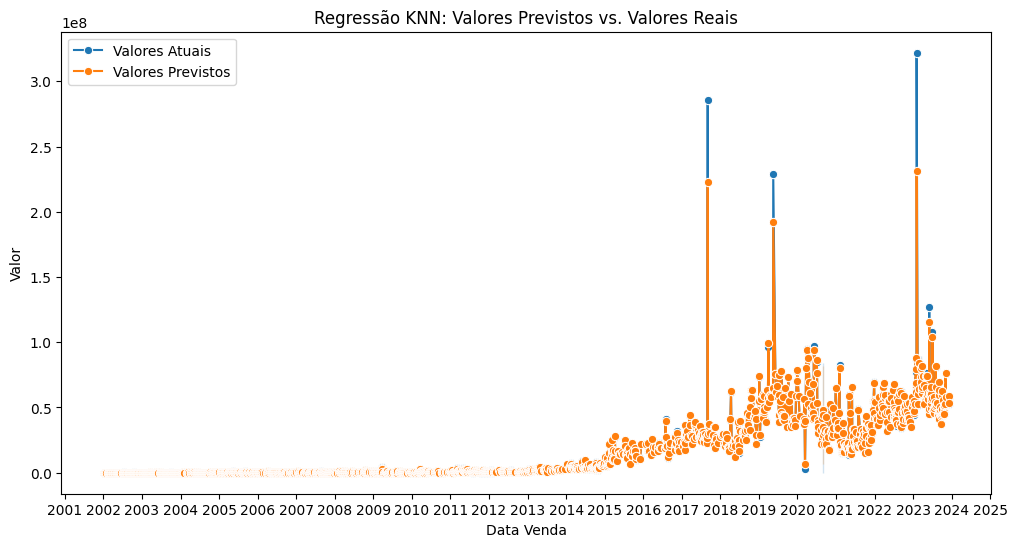

In [ ]:
plt.figure(figsize=(12, 6))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
sns.lineplot(x='Data Venda', y=y_test, data=X_test, label='Valores Atuais', marker='o')
sns.lineplot(x='Data Venda', y=y_pred, data=X_test, label='Valores Previstos', marker='o')

plt.title('Regressão KNN: Valores Previstos vs. Valores Reais')
plt.xlabel('Data Venda')
plt.ylabel('Valor')
plt.legend()
plt.show()

## Construindo um modelo utilizando regressão linear.

### Definindo e treinando o modelo com regressão linear.

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

### Fazendo a predição.

In [ ]:
y_pred_linear = linear_model.predict(X_test_scaled)

### Avaliando o desempenho do modelo com regressão linear.

In [ ]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression Metrics:")
print("Mean Squared Error:", mse_linear)
print("Mean Absolute Error:", mae_linear)
print("R-squared:", r2_linear)

Linear Regression Metrics:
Mean Squared Error: 10700908169691.182
Mean Absolute Error: 1909147.7468306394
R-squared: 0.9808077660579665


### Visualização dos valores previstos contra valores reais utilizando regressão linear.

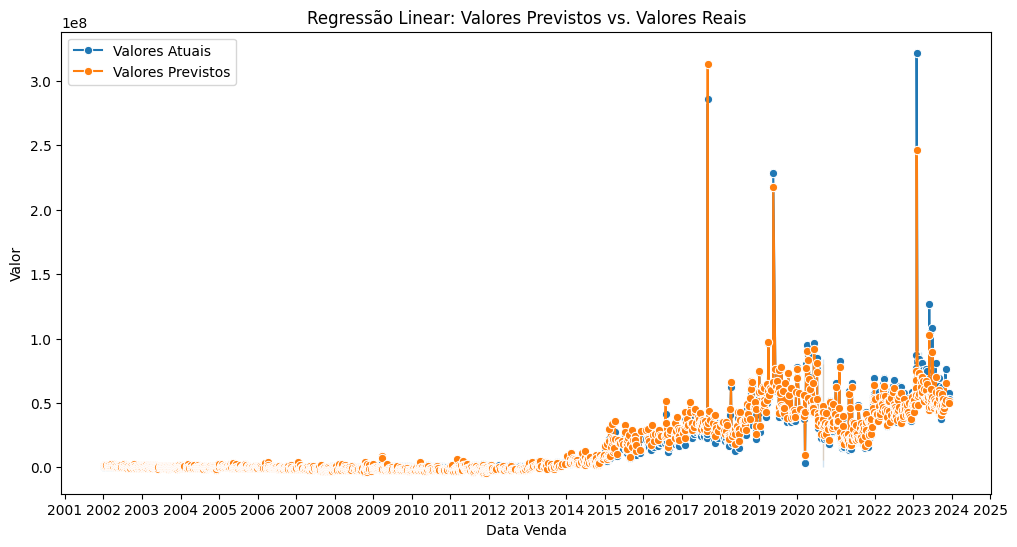

In [ ]:
plt.figure(figsize=(12, 6))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
sns.lineplot(x='Data Venda', y=y_test, data=X_test, label='Valores Atuais', marker='o')
sns.lineplot(x='Data Venda', y=y_pred_linear, data=X_test, label='Valores Previstos', marker='o')

plt.title('Regressão Linear: Valores Previstos vs. Valores Reais')
plt.xlabel('Data Venda')
plt.ylabel('Valor')
plt.legend()
plt.show()

## Construindo um modelo utilizando floresta aleatória.

### Definindo e treinando o modelo com regressão da floresta aleatória.

In [ ]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

### Fazendo a predição.

In [ ]:
y_pred_rf = random_forest_model.predict(X_test_scaled)

### Avaliando o desempenho do modelo com regressão da floresta aleatória.

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression Metrics:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared:", r2_rf)

Random Forest Regression Metrics:
Mean Squared Error: 3376486696162.851
Mean Absolute Error: 159469.73862856414
R-squared: 0.9939442221587823


### Visualização dos valores previstos contra valores reais utilizando regressão da floresta aleatória.

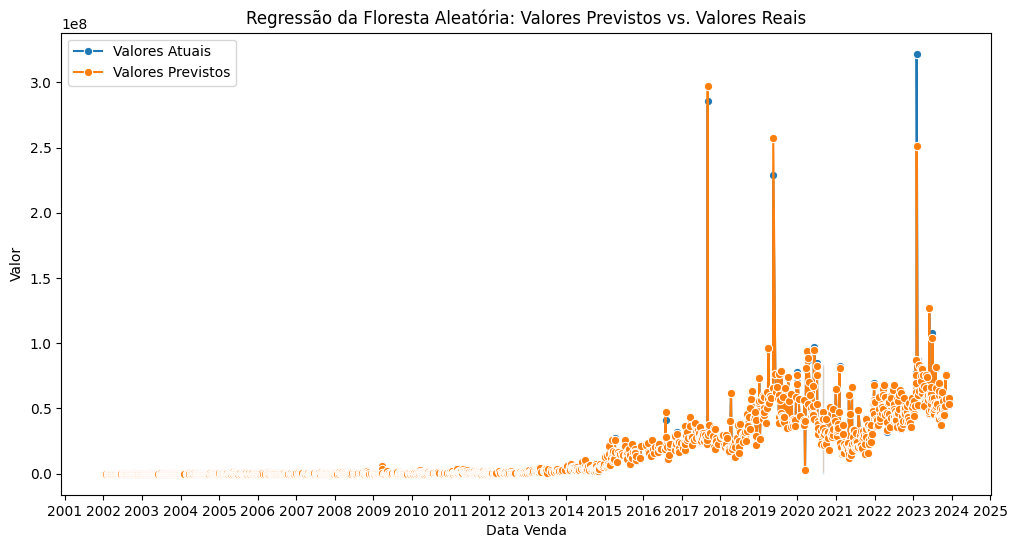

In [ ]:
plt.figure(figsize=(12, 6))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
sns.lineplot(x='Data Venda', y=y_test, data=X_test, label='Valores Atuais', marker='o')
sns.lineplot(x='Data Venda', y=y_pred_rf, data=X_test, label='Valores Previstos', marker='o')

plt.title('Regressão da Floresta Aleatória: Valores Previstos vs. Valores Reais')
plt.xlabel('Data Venda')
plt.ylabel('Valor')
plt.legend()
plt.show()